## BT4222 Project

In [63]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

#### Exploratory Data Analysis

In [2]:
master_df = pd.read_csv('AmesHousing.csv')
df = master_df.copy()

In [3]:
missing_values = df.isnull().sum()

# Print the columns with missing values
print('Columns with missing values:')
print(missing_values[missing_values > 0])

Columns with missing values:
Lot Frontage       490
Alley             2732
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


In [4]:
num_rows = df.shape[0]
num_cols = df.shape[1]

# Print the results
print(f'The DataFrame has {num_rows} rows and {num_cols} columns.')

The DataFrame has 2930 rows and 82 columns.


In [5]:
# Get a glimpse of the data
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
# Let's see the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [7]:
#Drop Order, PID as they are both identifiers and iid
df = df.drop(['Order', 'PID'], axis = 1)

In [8]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Statistics of data
Here we check if there are values that are potentially out of range in the variable.

In [9]:
def my_df_describe(df):
    objects = []
    numerics = []
    for c in df:
        if (df[c].dtype == object):
            objects.append(c)
        else:
            numerics.append(c)

    return df[numerics].describe(), df[objects].describe()

df_numeric, df_object = my_df_describe(df)

In [10]:
df_numeric.to_csv("Numeric_describe.csv")
df_object.to_csv("Objects_describe.csv")

#### Exploratory Visualisation

We will view the distribution for variables such as SalePrice, Lot Area, Lot Shape, Alley and Sale Type

Analysis of SalePrice

In [64]:
df['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

c:\Users\kaitl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


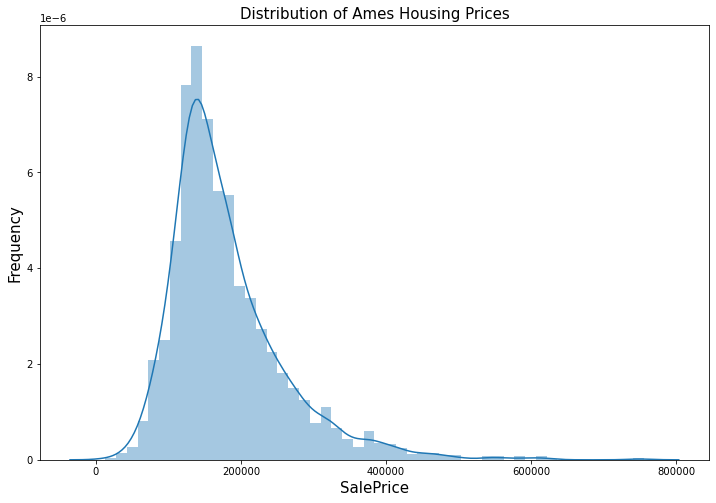

In [65]:
saleprice = df['SalePrice']
fig, ax = plt.subplots(figsize = (12,8))
g = sns.distplot(saleprice)
plt.title("Distribution of Ames Housing Prices", fontsize = 15)
plt.xlabel("SalePrice", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.show()

Text(0, 0.5, 'SalePrice')

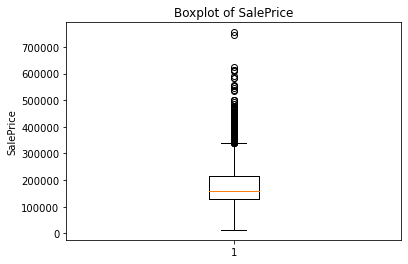

In [66]:
plt.boxplot(df['SalePrice'])
plt.title('Boxplot of SalePrice')
plt.ylabel('SalePrice')

Analysis of Lot Area

In [67]:
df['Lot Area'].describe()

count      2930.000000
mean      10147.921843
std        7880.017759
min        1300.000000
25%        7440.250000
50%        9436.500000
75%       11555.250000
max      215245.000000
Name: Lot Area, dtype: float64

c:\Users\kaitl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


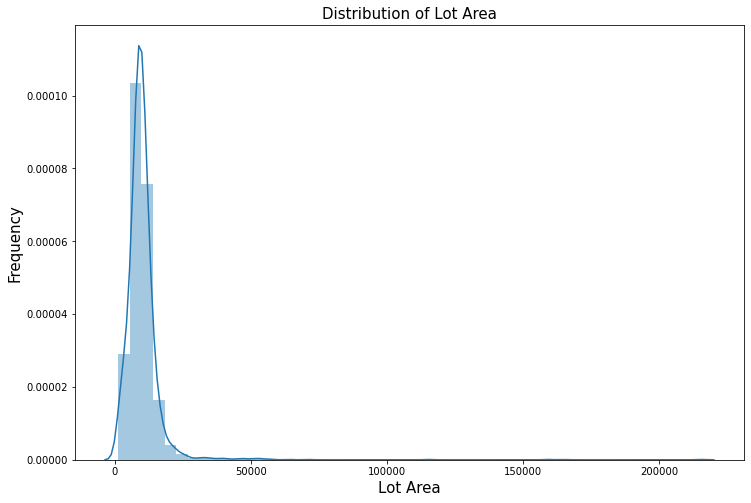

In [68]:
lotarea = df['Lot Area']
fig, ax = plt.subplots(figsize = (12,8))
b = sns.distplot(lotarea)
plt.title("Distribution of Lot Area", fontsize = 15)
plt.xlabel("Lot Area", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.show()

Text(0, 0.5, 'Lot Area')

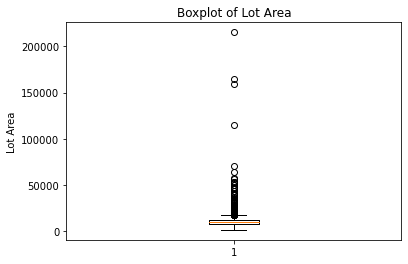

In [69]:
plt.boxplot(df['Lot Area'])
plt.title('Boxplot of Lot Area')
plt.ylabel('Lot Area')

Analysis of Lot Shape

In [70]:
df['Lot Shape'].value_counts()

Reg    1859
IR1     979
IR2      76
IR3      16
Name: Lot Shape, dtype: int64

<AxesSubplot:>

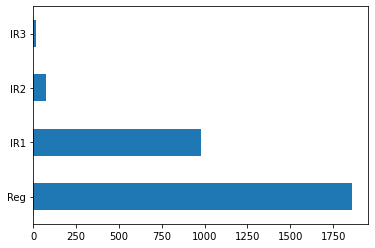

In [71]:
df['Lot Shape'].value_counts().plot(kind = "barh")

Analysis of Alley

In [72]:
df['Alley'].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

<AxesSubplot:>

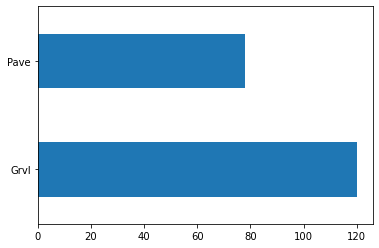

In [73]:
df['Alley'].value_counts().plot(kind = "barh")

Analysis of Sale Type

In [74]:
df['Sale Type'].value_counts()

WD       2536
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
VWD         1
Name: Sale Type, dtype: int64

In [75]:
# We want to combine WD, CWD and VWD into a single cateogry as WD.
# We will also combine Con, ConLI, ConLD and ConLw into Con
df['Sale Type'].replace({'CWD':'WD ', 'VWD':'WD ', 'ConLD':'Con', 'ConLI':'Con', 'ConLw':'Con'}, inplace=True)
df['Sale Type'].value_counts()

WD     2549
New     239
COD      87
Con      48
Oth       7
Name: Sale Type, dtype: int64

<AxesSubplot:>

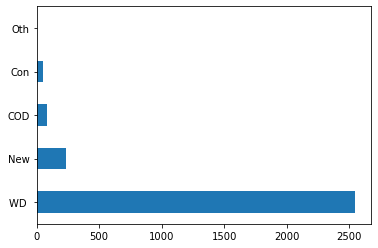

In [76]:
df['Sale Type'].value_counts().plot(kind = "barh")

# Data cleaning
### Missing values


In [11]:
for col in df.columns:
    if df[col].isna().sum() > 0:
        print(f' "{col}" : {df[col].isna().sum()}')
    else:
        continue

 "Lot Frontage" : 490
 "Alley" : 2732
 "Mas Vnr Type" : 23
 "Mas Vnr Area" : 23
 "Bsmt Qual" : 80
 "Bsmt Cond" : 80
 "Bsmt Exposure" : 83
 "BsmtFin Type 1" : 80
 "BsmtFin SF 1" : 1
 "BsmtFin Type 2" : 81
 "BsmtFin SF 2" : 1
 "Bsmt Unf SF" : 1
 "Total Bsmt SF" : 1
 "Electrical" : 1
 "Bsmt Full Bath" : 2
 "Bsmt Half Bath" : 2
 "Fireplace Qu" : 1422
 "Garage Type" : 157
 "Garage Yr Blt" : 159
 "Garage Finish" : 159
 "Garage Cars" : 1
 "Garage Area" : 1
 "Garage Qual" : 159
 "Garage Cond" : 159
 "Pool QC" : 2917
 "Fence" : 2358
 "Misc Feature" : 2824


In [12]:
#Lot frontage
Lot_Frontage_NA = df[df['Lot Frontage'].isna()]

#i think do k nearest neighbours bc if we remove we will lose a lot of data
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df['Lot Frontage'] = imputer.fit_transform(df[['Lot Frontage']])

In [13]:
#Alley
#NA means no alley access -> change NA to no_Access
df['Alley'] = df['Alley'].fillna('no_access')

#Fence
#NA means no fence -> change NA to no_fence
df['Fence'] = df['Fence'].fillna('no_fence')

#Pool QC 
#NA means no pool -> change NA to no_pool
df['Pool QC'] = df['Pool QC'].fillna('no_pool')

#misc val
#NA means none -> change NA to no_misc
df['Misc Feature'] = df['Misc Feature'].fillna('no_misc')

#Fireplace Qu
#NA means no fireplace -> change NA to no fireplace
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('no_fireplace')

In [14]:
#Basmt Qual / Bsmt Cond / Bsmt Type 1
# NA means no basement -> change NA to no_basement
df['Bsmt Qual'] = df['Bsmt Qual'].fillna('no_basement')
df['Bsmt Cond'] = df['Bsmt Cond'].fillna('no_basement')
df['BsmtFin Type 1'] = df['Bsmt Cond'].fillna('no_basement')

# 80 of the bsmt exposure is na bc there is no basement in the first place, so i will set the NA to no_basement
df.loc[df['Bsmt Qual'] == 'no_basement', 'Bsmt Exposure'] = 'no_basement'
#other 3 is rly just na so remove
df = df.dropna(subset=['Bsmt Exposure'])

#if type 1 says no basement then obvi type 2 also no basement
df.loc[df['BsmtFin Type 1'] == 'no_basement', 'BsmtFin Type 2'] = 'no_basement'
#other 1 is rly just na so remove
df = df.dropna(subset=['BsmtFin Type 2'])

#na values for sf1, sf2, total sf, unf sf, bsmt bath is bc there is no basement
#so i will replace the NA with 0
columns_to_fill = ['BsmtFin SF 1','BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[columns_to_fill] = df[columns_to_fill].fillna(0)

In [15]:
#Mass Vnr Type / Mass Vnr Area
mass_vnr_NA = df[df['Mas Vnr Type'].isna()]
mass_vnr_NA
#no info on mass_vnr_area = no info on mass_vnr_type
#will just remove
df = df.dropna(subset=['Mas Vnr Type'])

In [16]:
#drop electrical na
df = df.dropna(subset=['Electrical'])

In [17]:
df['Garage Qual'] = df['Garage Qual'].fillna('no_garage')
df['Garage Cond'] = df['Garage Cond'].fillna('no_garage')
df['Garage Finish'] = df['Garage Finish'].fillna('no_garage')
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna('no_garage')
df.loc[df['Garage Qual'] == 'no_garage', 'Garage Type'] = 'no_garage'

cols_to_fill = ['Garage Cars','Garage Area']
df[cols_to_fill] = df[cols_to_fill].fillna(0)

In [18]:
len(df)

2902

In [19]:
for col in df.columns:
    if df[col].isna().sum() > 0:
        print(f' "{col}" : {df[col].isna().sum()}')
    else:
        continue

# Create new features

1. House Age


In [20]:
#House age = Year sold - year remodel 
#remove year sold, year remod, year built
def house_age(df):
    df['House Age'] = (df['Yr Sold'] - df['Year Remod/Add'])
    df.drop(columns = ['Yr Sold','Year Remod/Add','Year Built'], inplace = True)

2. Bathrooms

In [21]:
#Add up the no. of bathrooms together
def total_bathrooms(df):
    df['Total Bathrooms'] = (df['Full Bath'] + (0.5 * df['Half Bath']) + df['Bsmt Full Bath'] + (0.5 * df['Bsmt Half Bath']))
    df.drop(columns = ['Full Bath','Half Bath','Bsmt Full Bath','Bsmt Half Bath'], inplace = True)

3. Total porch sf

In [22]:
#Add up the SF of the porches together
def total_porch_sf(df):
    df['Total Porch SF'] = (df['Wood Deck SF'] + df['Open Porch SF'] + df['Enclosed Porch'] + df['3Ssn Porch'] + df['Screen Porch'])
    df.drop(columns = ['Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch'], inplace = True)

4. Drop these as they add up to total gr livign area

In [23]:
def drop_floors_sf(df):
    df.drop(columns = ['1st Flr SF','2nd Flr SF','Low Qual Fin SF'], inplace = True)

5. Drop this as it adds up to total bsmt

In [24]:
def drop_bsmt_sf(df):
    df.drop(columns = ['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF'], inplace = True)

In [25]:
house_age(df)
total_bathrooms(df)
total_porch_sf(df)
drop_floors_sf(df)
drop_bsmt_sf(df)

df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Fence,Misc Feature,Misc Val,Mo Sold,Sale Type,Sale Condition,SalePrice,House Age,Total Bathrooms,Total Porch SF
0,20,RL,141.0,31770,Pave,no_access,IR1,Lvl,AllPub,Corner,...,no_fence,no_misc,0,5,WD,Normal,215000,50,2.0,272
1,20,RH,80.0,11622,Pave,no_access,Reg,Lvl,AllPub,Inside,...,MnPrv,no_misc,0,6,WD,Normal,105000,49,1.0,260
2,20,RL,81.0,14267,Pave,no_access,IR1,Lvl,AllPub,Corner,...,no_fence,Gar2,12500,6,WD,Normal,172000,52,1.5,429
3,20,RL,93.0,11160,Pave,no_access,Reg,Lvl,AllPub,Corner,...,no_fence,no_misc,0,4,WD,Normal,244000,42,3.5,0
4,60,RL,74.0,13830,Pave,no_access,IR1,Lvl,AllPub,Inside,...,MnPrv,no_misc,0,3,WD,Normal,189900,12,2.5,246


# Removal of outliers


1. Gr Living area

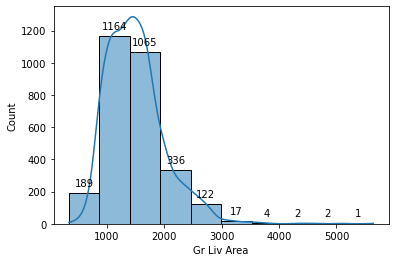

In [26]:
#before removing, this is my distribution

plt.figure(figsize=(6, 4))
hist_data = sns.histplot(data=df, x='Gr Liv Area', kde=True, bins=10)
#plt.title(f'Histogram of {'Gr Liv Area'}')
for rect in hist_data.patches:
    height = rect.get_height()
    plt.gca().annotate(f'{int(height)}',
                       xy=(rect.get_x() + rect.get_width() / 2, height),
                       xytext=(0, 5),  # 5 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom')

plt.show()

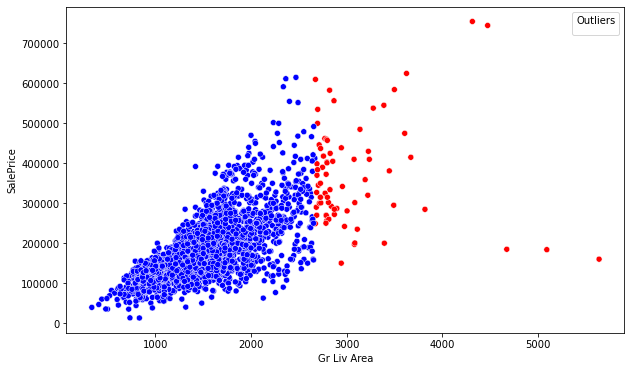

74


In [27]:
#GrLivArea outliers just using IQR (never log transform)
Q1_A = df['Gr Liv Area'].quantile(0.25)
Q3_A = df['Gr Liv Area'].quantile(0.75)
IQR_A = Q3_A - Q1_A

# Define outliers in column A and column B
outliers = (df['Gr Liv Area'] < Q1_A - 1.5 * IQR_A) | (df['Gr Liv Area'] > Q3_A + 1.5 * IQR_A)

# Plot the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice', hue=outliers, palette=['blue', 'red'])

# Customize the plot
#plt.title('Scatterplot of Column A vs Column B')
plt.xlabel('Gr Liv Area')
plt.ylabel('SalePrice')

# Remove the outlier legend
plt.legend(title='Outliers', labels=[])

# Show the plot
plt.show()

#count outliers
outlier_count = outliers.sum()
print(outlier_count)

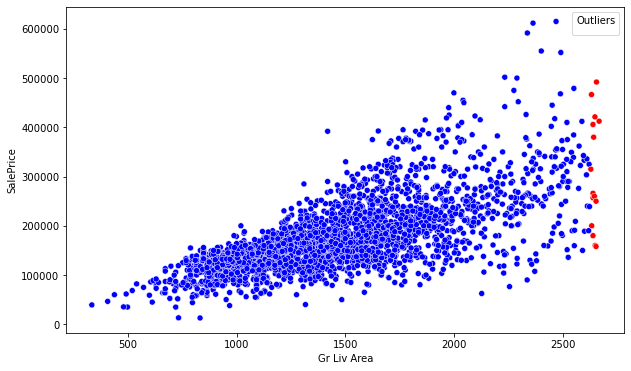

16


In [28]:
#when i remove outliers outside IQR
df_filtered = df[~outliers]

Q1_A = df_filtered['Gr Liv Area'].quantile(0.25)
Q3_A = df_filtered['Gr Liv Area'].quantile(0.75)
IQR_A = Q3_A - Q1_A

# Define outliers in column A and column B
outliers = (df_filtered['Gr Liv Area'] < Q1_A - 1.5 * IQR_A) | (df_filtered['Gr Liv Area'] > Q3_A + 1.5 * IQR_A)

# Plot the scatterplot
plt.figure(figsize=(10, 6))
custom_palette ={True: 'red', False: 'blue'}
sns.scatterplot(data=df_filtered, x='Gr Liv Area', y='SalePrice', hue=outliers, palette=custom_palette)

# Customize the plot
#plt.title('Scatterplot of Column A vs Column B')
plt.xlabel('Gr Liv Area')
plt.ylabel('SalePrice')

# Remove the outlier legend
plt.legend(title='Outliers', labels=[])

# Show the plot
plt.show()

#count outliers
outlier_count = outliers.sum()
print(outlier_count)
#idk why still got outliers left

### LOG TRANSFORM

In [29]:
df['Log Gr Liv Area'] = np.log(df['Gr Liv Area'])

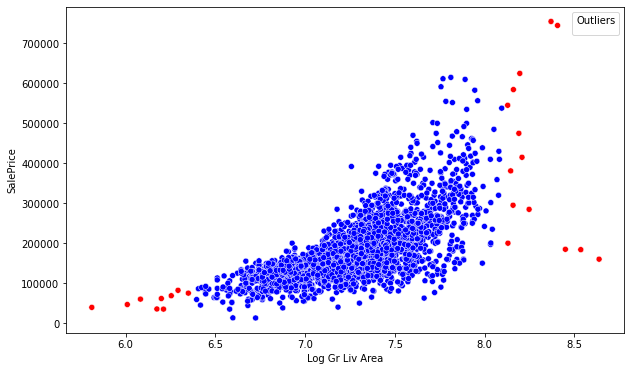

23


In [30]:
#when i log transform, what are the outliers
Q1_A = df['Log Gr Liv Area'].quantile(0.25)
Q3_A = df['Log Gr Liv Area'].quantile(0.75)
IQR_A = Q3_A - Q1_A

# Define outliers in column A and column B
log_outliers = (df['Log Gr Liv Area'] < Q1_A - 1.5 * IQR_A) | (df['Log Gr Liv Area'] > Q3_A + 1.5 * IQR_A)

# Plot the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Log Gr Liv Area', y='SalePrice', hue=log_outliers, palette=['blue', 'red'])

# Customize the plot
#plt.title('Scatterplot of Column A vs Column B')
plt.xlabel('Log Gr Liv Area')
plt.ylabel('SalePrice')

# Remove the outlier legend
plt.legend(title='Outliers', labels=[])

# Show the plot
plt.show()

#count outliers
log_outlier_count = log_outliers.sum()
print(log_outlier_count)

In [31]:
df_log_filtered = df[~log_outliers]

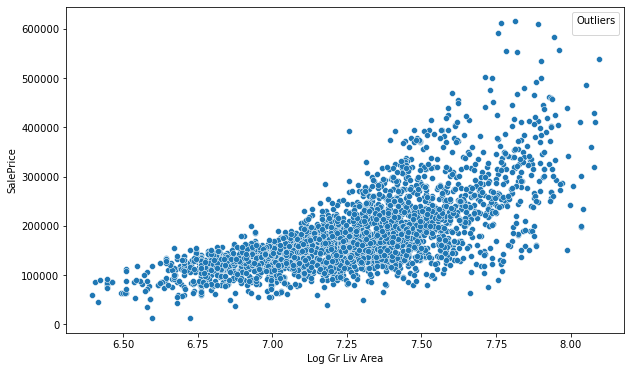

In [32]:
# Plot the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_log_filtered, x='Log Gr Liv Area', y='SalePrice')

# Customize the plot
#plt.title('Scatterplot of Column A vs Column B')
plt.xlabel('Log Gr Liv Area')
plt.ylabel('SalePrice')

# Remove the outlier legend
plt.legend(title='Outliers', labels=[])

# Show the plot
plt.show()

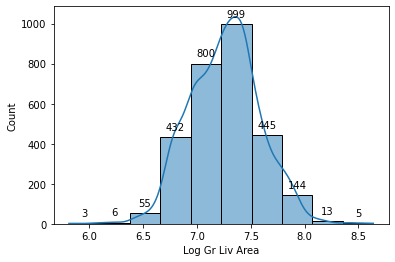

In [33]:
#when i log transform
plt.figure(figsize=(6, 4))
hist_data = sns.histplot(data=df, x='Log Gr Liv Area', kde=True, bins=10)
#plt.title(f'Histogram of {'Gr Liv Area'}')
for rect in hist_data.patches:
    height = rect.get_height()
    plt.gca().annotate(f'{int(height)}',
                       xy=(rect.get_x() + rect.get_width() / 2, height),
                       xytext=(0, 5),  # 5 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom')

plt.show()

In [34]:
df = df_log_filtered

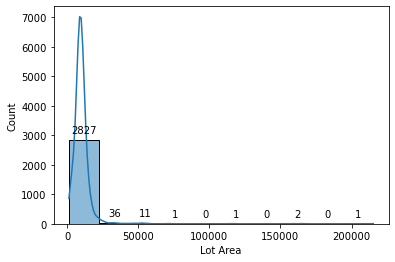

In [35]:
#Lot Area
#current distribution
plt.figure(figsize=(6, 4))
hist_data = sns.histplot(data=df, x='Lot Area', kde=True, bins=10)
#plt.title(f'Histogram of {'Gr Liv Area'}')
for rect in hist_data.patches:
    height = rect.get_height()
    plt.gca().annotate(f'{int(height)}',
                       xy=(rect.get_x() + rect.get_width() / 2, height),
                       xytext=(0, 5),  # 5 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom')

plt.show()

In [36]:
df_filtered2 = df[df['Lot Area'] <= 30000]

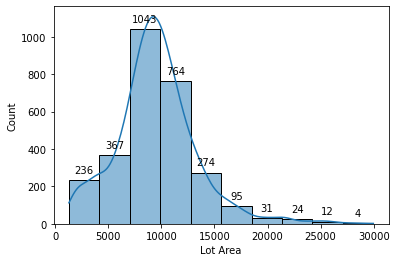

In [37]:
plt.figure(figsize=(6, 4))
hist_data = sns.histplot(data=df_filtered2, x='Lot Area', kde=True, bins=10)
#plt.title(f'Histogram of {'Gr Liv Area'}')
for rect in hist_data.patches:
    height = rect.get_height()
    plt.gca().annotate(f'{int(height)}',
                       xy=(rect.get_x() + rect.get_width() / 2, height),
                       xytext=(0, 5),  # 5 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom')

plt.show()

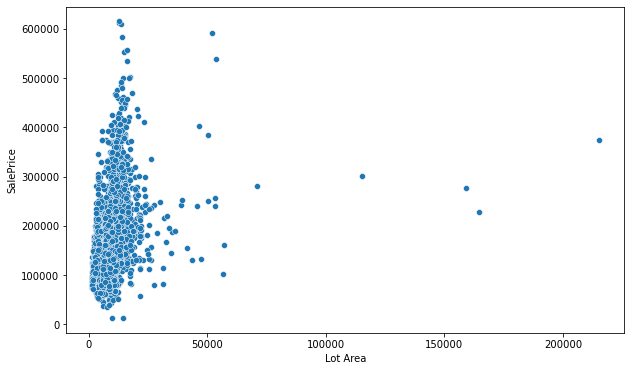

In [38]:
# Plot the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Lot Area', y='SalePrice')

# Customize the plot
#plt.title('Scatterplot of Column A vs Column B')
plt.xlabel('Lot Area')
plt.ylabel('SalePrice')


# Show the plot
plt.show()

#idk why still got outliers left

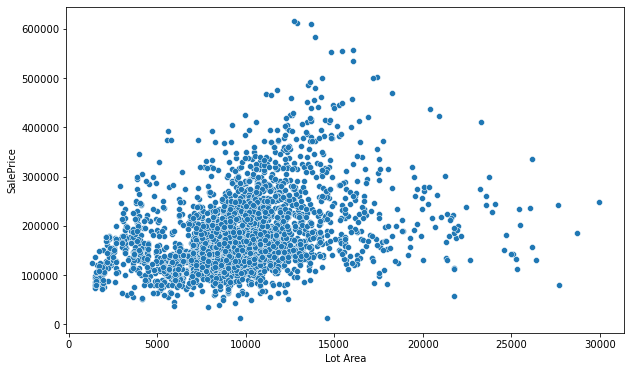

In [39]:
# Plot the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered2, x='Lot Area', y='SalePrice')

# Customize the plot
#plt.title('Scatterplot of Column A vs Column B')
plt.xlabel('Lot Area')
plt.ylabel('SalePrice')


# Show the plot
plt.show()

#idk why still got outliers left

In [40]:
df = df_filtered2

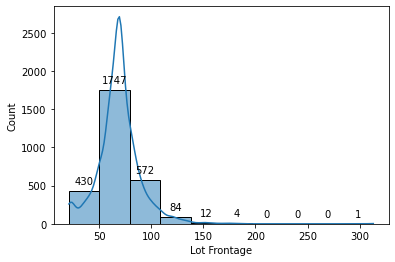

In [41]:
#current distribution
plt.figure(figsize=(6, 4))
hist_data = sns.histplot(data=df, x='Lot Frontage', kde=True, bins=10)
#plt.title(f'Histogram of {'Gr Liv Area'}')
for rect in hist_data.patches:
    height = rect.get_height()
    plt.gca().annotate(f'{int(height)}',
                       xy=(rect.get_x() + rect.get_width() / 2, height),
                       xytext=(0, 5),  # 5 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom')

plt.show()

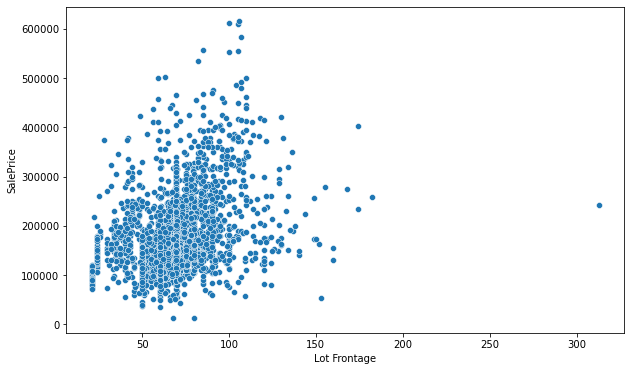

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Lot Frontage', y='SalePrice')

# Customize the plot
#plt.title('Scatterplot of Column A vs Column B')
plt.xlabel('Lot Frontage')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

In [43]:
df = df[df['Lot Frontage'] <= 150]

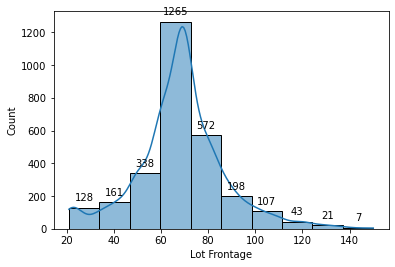

In [44]:
plt.figure(figsize=(6, 4))
hist_data = sns.histplot(data=df, x='Lot Frontage', kde=True, bins=10)
#plt.title(f'Histogram of {'Gr Liv Area'}')
for rect in hist_data.patches:
    height = rect.get_height()
    plt.gca().annotate(f'{int(height)}',
                       xy=(rect.get_x() + rect.get_width() / 2, height),
                       xytext=(0, 5),  # 5 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom')

plt.show()

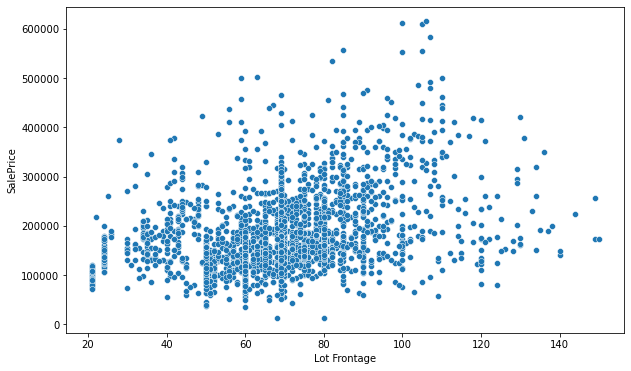

In [45]:
# Plot the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Lot Frontage', y='SalePrice')

# Customize the plot
#plt.title('Scatterplot of Column A vs Column B')
plt.xlabel('Lot Frontage')
plt.ylabel('SalePrice')

# Show the plot
plt.show()


In [46]:
len(df)

2840

4. total porch sf


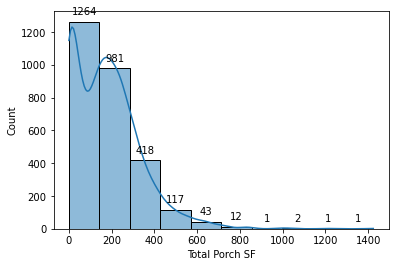

In [47]:
#current distribution
plt.figure(figsize=(6, 4))
hist_data = sns.histplot(data=df, x='Total Porch SF', kde=True, bins=10)
#plt.title(f'Histogram of {'Gr Liv Area'}')
for rect in hist_data.patches:
    height = rect.get_height()
    plt.gca().annotate(f'{int(height)}',
                       xy=(rect.get_x() + rect.get_width() / 2, height),
                       xytext=(0, 5),  # 5 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom')

plt.show()

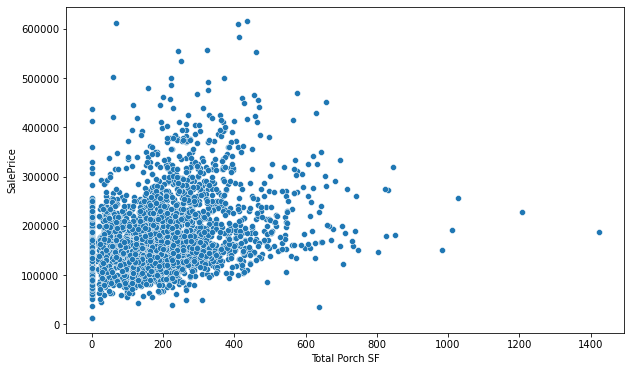

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total Porch SF', y='SalePrice')

# Customize the plot
#plt.title('Scatterplot of Column A vs Column B')
plt.xlabel('Total Porch SF')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

In [49]:
df = df[df['Total Porch SF'] <= 800]

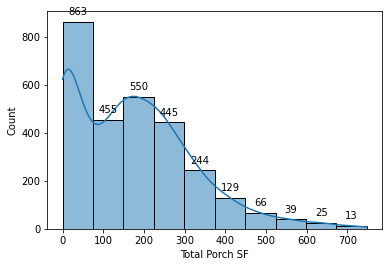

In [50]:
plt.figure(figsize=(6, 4))
hist_data = sns.histplot(data=df, x='Total Porch SF', kde=True, bins=10)
#plt.title(f'Histogram of {'Gr Liv Area'}')
for rect in hist_data.patches:
    height = rect.get_height()
    plt.gca().annotate(f'{int(height)}',
                       xy=(rect.get_x() + rect.get_width() / 2, height),
                       xytext=(0, 5),  # 5 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom')

plt.show()

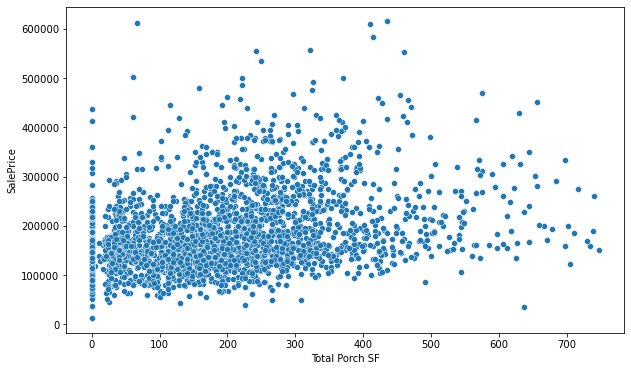

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total Porch SF', y='SalePrice')

# Customize the plot
#plt.title('Scatterplot of Column A vs Column B')
plt.xlabel('Total Porch SF')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

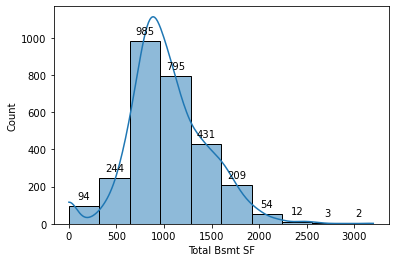

In [52]:
#current distribution
plt.figure(figsize=(6, 4))
hist_data = sns.histplot(data=df, x='Total Bsmt SF', kde=True, bins=10)
#plt.title(f'Histogram of {'Gr Liv Area'}')
for rect in hist_data.patches:
    height = rect.get_height()
    plt.gca().annotate(f'{int(height)}',
                       xy=(rect.get_x() + rect.get_width() / 2, height),
                       xytext=(0, 5),  # 5 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom')

plt.show()

# Removal of multicollinearity between features

Text(0.5, 1.0, 'Correlation of numeric features in Ames Housing dataset')

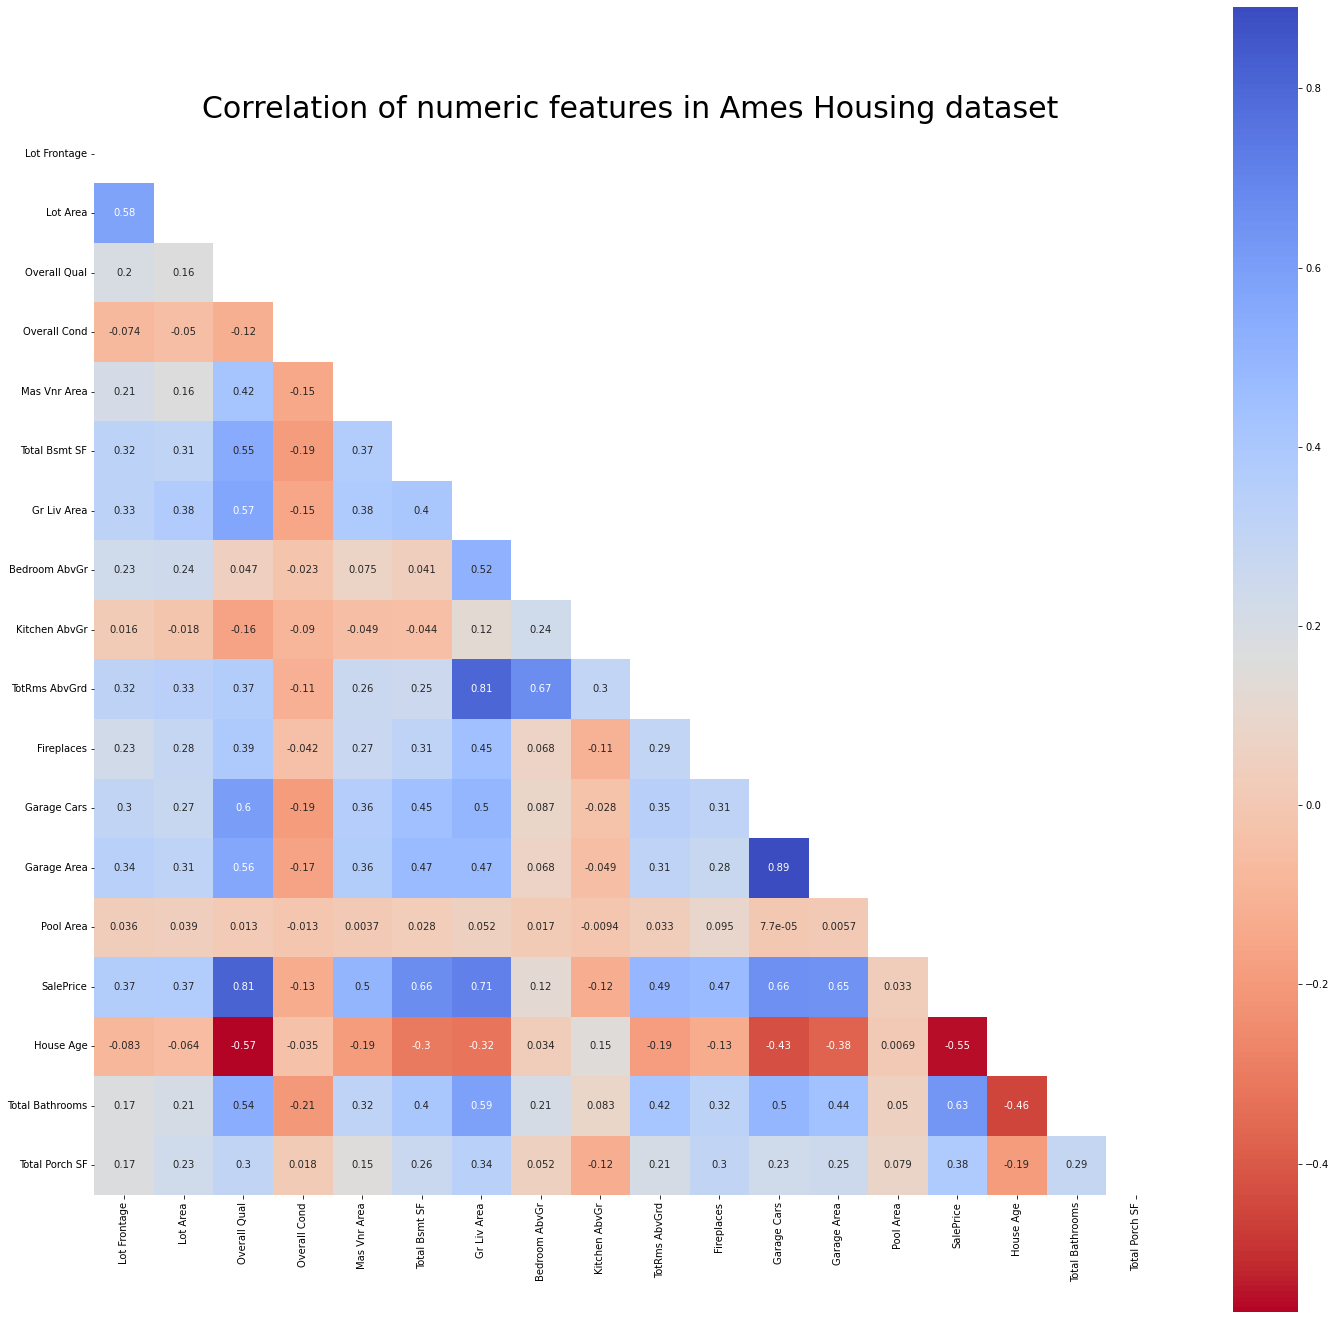

In [53]:
df_corr = df[['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Mas Vnr Area', 'Total Bsmt SF', 'Gr Liv Area', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Pool Area', 'SalePrice', 'House Age', 'Total Bathrooms', 'Total Porch SF']]
corr = df_corr.corr()
fig, ax = plt.subplots(figsize = (24,24))
#mask for diagonal heatmap
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
        mask=mask,
        cmap = 'coolwarm_r',
        annot = True,
        square=True)

ax.tick_params(labelsize=10)
plt.title('Correlation of numeric features in Ames Housing dataset', fontsize=30)

In [54]:
df.drop(columns = ['TotRms AbvGrd','Garage Cars'], axis = 1, inplace = True)

In [55]:
len(df)

2829

In [56]:
print(df.shape)

(2829, 64)


In [57]:
df_clean = df
df_clean.to_csv('AmesHousing_clean.csv', index = False)

# Feature Selection

We are now confident that the data has been cleaned appropriately. We will extract the relevant features for building the models.

In [1]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df_clean = pd.read_csv("Ameshousing_clean.csv")

In [5]:
df_clean.select_dtypes(include=['object']).columns


Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence',
       'Misc Feature', 'Sale Type', 'Sale Condition'],
      dtype='object')

In [32]:
neighbourhoods_lst = df_clean.Neighborhood.unique()
neighbourhoods_lst.sort()

In [41]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence',
       'Misc Feature', 'Sale Type', 'Sale Condition']

df_clean[cols] = df_clean[cols].apply(le.fit_transform)


In [42]:
X = df_clean.drop('SalePrice', axis=1)
y = df_clean['SalePrice']

# prepare your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

c:\Users\kaitl\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


MSE: 484497503.68759674


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

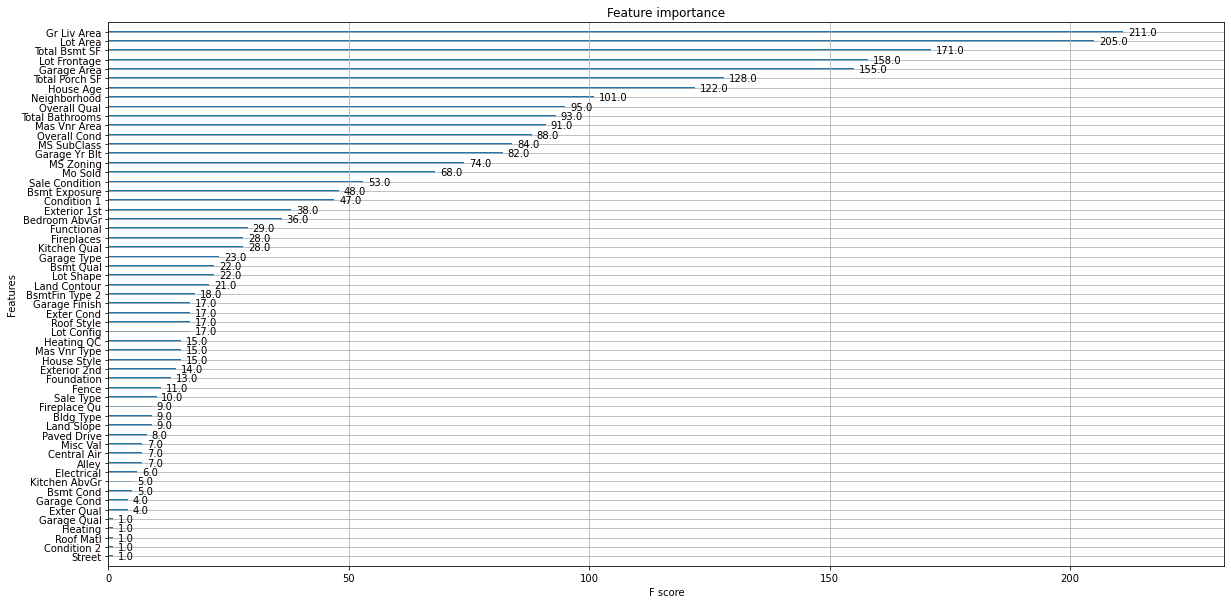

In [64]:
# define the objective and evaluation metric
objective = 'reg:squarederror'
eval_metric = 'rmse'

# specify the XGBoost model
params = {'objective': objective,
          'eval_metric': eval_metric,
          'max_depth': 5,
          'learning_rate': 0.1,
          'n_estimators': 100}

# train the model
xgb_model = xgb.XGBRegressor(**params)
xgb_model.fit(X_train, y_train)

# evaluate the model
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

plt.rcParams['figure.figsize'] = (20, 10)
# analyze the feature importances
xgb.plot_importance(xgb_model)

Based off the Feature Importance plot, we will be selecting the top 16 most important features for our modelling

“Gr Liv Area”, ”Lot Area”, “Total Bsmt SF”, “Lot Frontage”, “Garage Area”, “House Age”, “Total Porch SF”, “Overall Cond”, “Neighbourhood” ,”Overall Qual”, “MS SubClass”, “Mas Vnr Area”, “Total Bathrooms”, “Mo Sold”, “Garage Yr Blt”, “Sale Condition”


In [43]:
important_features = ["Gr Liv Area", "Lot Area", "Total Bsmt SF", "Lot Frontage", "Garage Area", "House Age", "Total Porch SF", "Overall Cond", "Neighborhood" ,"Overall Qual", "MS SubClass", "Mas Vnr Area", "Total Bathrooms", "Mo Sold", "Garage Yr Blt", "Sale Condition","SalePrice"]
df_important_features = df_clean[important_features]

In [44]:
df_important_features
df_important_features['SalePrice'] = df_important_features['SalePrice'].div(1000)

/var/folders/w8/h17mq4cj57xf632w6g0q6lv40000gn/T/ipykernel_15224/2855343903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_important_features['SalePrice'] = df_important_features['SalePrice'].div(1000)


In [8]:
df_important_features.select_dtypes(include=['int']).columns

Index(['Gr Liv Area', 'Lot Area', 'House Age', 'Total Porch SF',
       'Overall Cond', 'Overall Qual', 'MS SubClass', 'Mo Sold',
       'Garage Yr Blt', 'Sale Condition'],
      dtype='object')

In [9]:
df_important_features.select_dtypes(include=['float']).columns

Index(['Total Bsmt SF', 'Lot Frontage', 'Garage Area', 'Mas Vnr Area',
       'Total Bathrooms', 'SalePrice'],
      dtype='object')

In [45]:
dummy_pd = pd.get_dummies(df_important_features, columns = [ 'Neighborhood', 'MS SubClass'])

In [46]:
X_impt = dummy_pd.drop('SalePrice', axis=1)
y_impt = dummy_pd['SalePrice']

# prepare your data
X_train, X_test, y_train, y_test = train_test_split(X_impt, y_impt, test_size=0.3, random_state=42)

In [47]:
from sklearn.preprocessing import MinMaxScaler
## Here we scale the data using the MinMaxScaler from the sklearn package
scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dummy_pd)
scaled_data = pd.DataFrame(scaled_data,columns = dummy_pd.columns) 
scaled_data.head()
X = scaled_data.drop( "SalePrice" , axis = 1 ) 
y = scaled_data ['SalePrice']

df_standardised = ( dummy_pd - dummy_pd.min()) / (dummy_pd.max() - dummy_pd.min() )
df_standardised['SalePrice'] = dummy_pd['SalePrice']
df_standardised

X_scaled = df_standardised.drop('SalePrice', axis=1)
y_scaled = df_standardised['SalePrice']

# prepare your data
X_train_s, X_test_s, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

In [48]:
dummy_pd


,Gr Liv Area,Lot Area,Total Bsmt SF,Lot Frontage,Garage Area,House Age,Total Porch SF,Overall Cond,Overall Qual,Mas Vnr Area,...,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190
0,896,11622,882.0,80.00000,730.0,49,260,6,5,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1329,14267,1329.0,81.00000,312.0,52,429,6,6,108.0,...,0,0,0,0,0,0,0,0,0,0
2,2110,11160,2110.0,93.00000,522.0,42,0,5,7,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1629,13830,928.0,74.00000,482.0,12,246,5,5,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1604,9978,926.0,78.00000,470.0,12,396,6,6,20.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824,1003,7937,1003.0,37.00000,588.0,22,120,6,6,0.0,...,0,0,1,0,0,0,0,0,0,0
2825,902,8885,864.0,69.22459,484.0,23,164,5,5,0.0,...,0,0,0,0,0,0,0,0,0,0
2826,970,10441,912.0,62.00000,0.0,14,112,5,5,0.0,...,0,0,0,1,0,0,0,0,0,0
2827,1389,10010,1389.0,77.00000,418.0,31,278,5,5,0.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
scaled_data

,Gr Liv Area,Lot Area,Total Bsmt SF,Lot Frontage,Garage Area,House Age,Total Porch SF,Overall Cond,Overall Qual,Mas Vnr Area,...,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190
0,0.112543,0.360166,0.275625,0.457364,0.490591,0.819672,0.347594,0.625,0.444444,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.276620,0.452458,0.415313,0.465116,0.209677,0.868852,0.573529,0.625,0.555556,0.06750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.572565,0.344046,0.659375,0.558140,0.350806,0.704918,0.000000,0.500,0.666667,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.390299,0.437210,0.290000,0.410853,0.323925,0.213115,0.328877,0.500,0.444444,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.380826,0.302802,0.289375,0.441860,0.315860,0.213115,0.529412,0.625,0.555556,0.01250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824,0.153088,0.231585,0.313437,0.124031,0.395161,0.377049,0.160428,0.625,0.555556,0.00000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2825,0.114816,0.264664,0.270000,0.373834,0.325269,0.393443,0.219251,0.500,0.444444,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2826,0.140584,0.318957,0.285000,0.317829,0.000000,0.245902,0.149733,0.500,0.444444,0.00000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2827,0.299356,0.303918,0.434063,0.434109,0.280914,0.524590,0.371658,0.500,0.444444,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### X_train_s, X_test_s -> scaled x variables
### X_train, X_test -> not scaled x variables

# Linear Regression

In [49]:
from sklearn import linear_model
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

In [50]:
from sklearn.linear_model import LinearRegression

# Instantiate the linear regression model
lr_model = LinearRegression()

# Train the model using the training set
lr_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Calculate mean squared error on the training and testing sets
lr_mse_train = mean_squared_error(y_train, y_train_pred)
lr_mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate mean absolute error on the testing set
mae_lr = mean_absolute_error(y_test, y_test_pred)

# Compute R-squared error on the training and testing sets
rsquaredTrain = r2_score(y_train, y_train_pred)
rsquaredTest = r2_score(y_test, y_test_pred)

# Calculate percentage difference between MSE of train set and test set
lr_perc_diff = (lr_mse_train - lr_mse_test) / lr_mse_train * 100

print(f'MSE on Training set: {lr_mse_train}')
print(f'MSE on Testing set: {lr_mse_test}')
print(f'MAE on Testing set: {mae_lr}')
print(f'% difference between MSE of Train set and Test set: {str(lr_perc_diff)+"%"}')
print(f'R-squared error on Training set: {rsquaredTrain}')
print(f'R-squared error on Testing set: {rsquaredTest}')


MSE on Training set: 618.6886093583472
MSE on Testing set: 711.9042732502205
MAE on Testing set: 17.710000032082753
% difference between MSE of Train set and Test set: -15.066652671777634%
R-squared error on Training set: 0.8841666175558656
R-squared error on Testing set: 0.8946581088421863


In [51]:
coeff_lr = pd.DataFrame(zip(X_train.columns, lr_model.coef_), columns= ["Vaiable", "Coeff"])
coeff_lr.columns
coeff_lr = coeff_lr.sort_values(by='Coeff')
coeff_lr.to_csv("coeff.csv",index=False)

In [69]:
coeff_lr

,Vaiable,Coeff
31,Neighborhood_17,-3.126376e+01
34,Neighborhood_20,-2.362422e+01
55,MS SubClass_160,-2.265842e+01
25,Neighborhood_11,-2.098344e+01
35,Neighborhood_21,-2.052762e+01
37,Neighborhood_23,-2.037864e+01
29,Neighborhood_15,-1.849350e+01
28,Neighborhood_14,-1.784844e+01
36,Neighborhood_22,-1.742898e+01
41,Neighborhood_27,-1.425316e+01


Highest Coefficient

In [73]:
print(neighbourhoods_lst[10],neighbourhoods_lst[25])

GrnHill StoneBr


Lowest Coefficient

In [74]:
print(neighbourhoods_lst[17],neighbourhoods_lst[20])

NWAmes OldTown


# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
dt_model = DecisionTreeRegressor(random_state = 100, max_depth = 10, min_samples_split = 10, criterion="absolute_error")
dt_model.fit(X_train, y_train)

y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

dt_mse_train = mean_squared_error(y_train, y_train_pred)
dt_mse_test = mean_squared_error(y_test, y_test_pred)

# Compute R-squared error on the training and testing sets
dt_r2_train = r2_score(y_train, y_train_pred)
dt_r2_test = r2_score(y_test, y_test_pred)

# Calculate percentage difference between MSE of train set and test set
dt_perc_diff = (dt_mse_train - dt_mse_test) / dt_mse_train * 100

mae_dt = mean_absolute_error(y_test, y_test_pred)

print(f'MSE on Training set: {dt_mse_train}')
print(f'MSE on Testing set: {dt_mse_test}')
print(f'MAE on Testing set: {mae_dt}')
print(f'% difference between MSE of Train set and Test set: {str(dt_perc_diff)+"%"}')
print(f'R-squared error on Training set: {dt_r2_train}')
print(f'R-squared error on Testing set: {dt_r2_test}')

MSE on Training set: 274.2857240194445
MSE on Testing set: 1148.2053976819789
MAE on Testing set: 22.659431095406354
% difference between MSE of Train set and Test set: -318.61653638254285%
R-squared error on Training set: 0.9486471179706034
R-squared error on Testing set: 0.8300977637383613


In [148]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the hyperparameter grid to search over
param_grid = {
    "max_depth":range(1, 10),
    'min_samples_split': [2, 5, 10],
    "splitter" : ["best", "random"],
    "min_samples_split":range(1,10),
}

# Create decision tree model
dt_model = DecisionTreeRegressor(random_state = 100)

# Perform grid search with cross-validation
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
dt_model = grid_search.best_estimator_
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'max_depth': 8, 'min_samples_split': 8, 'splitter': 'random'}


In [54]:
# Make predictions on the training and testing sets
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Calculate mean squared error on the training and testing sets
dt_mse_train = mean_squared_error(y_train, y_train_pred)
dt_mse_test = mean_squared_error(y_test, y_test_pred)

# Compute R-squared error on the training and testing sets
dt_r2_train = r2_score(y_train, y_train_pred)
dt_r2_test = r2_score(y_test, y_test_pred)

# Calculate percentage difference between MSE of train set and test set
dt_perc_diff = (dt_mse_train - dt_mse_test) / dt_mse_train * 100

mae_dt = mean_absolute_error(y_test, y_test_pred)

# Print the MSE and percentage difference
print(f'MSE on Training set: {dt_mse_train}')
print(f'MSE on Testing set: {dt_mse_test}')
print(f'MAE on Testing set: {mae_dt}')
print(f'% difference between MSE of Train set and Test set: {str(dt_perc_diff)+"%"}')
print(f'R-squared error on Training set: {dt_r2_train}')
print(f'R-squared error on Testing set: {dt_r2_test}')

MSE on Training set: 274.2857240194445
MSE on Testing set: 1148.2053976819789
MAE on Testing set: 22.659431095406354
% difference between MSE of Train set and Test set: -318.61653638254285%
R-squared error on Training set: 0.9486471179706034
R-squared error on Testing set: 0.8300977637383613


# Gradient boost

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor 

In [56]:
GB_naive = GradientBoostingRegressor(random_state=109)
GB_naive.fit(X_train, y_train)

GB_ypred_naive_test = GB_naive.predict(X_test)
GB_ypred_naive_train = dt_model.predict(X_train)

gb_mse_train = mean_squared_error(y_train, GB_ypred_naive_train)
gb_mse_test = mean_squared_error(y_test, GB_ypred_naive_test)

# Compute R-squared error on the training and testing sets
gb_r2_train = r2_score(y_train, GB_ypred_naive_train)
gb_r2_test = r2_score(y_test, GB_ypred_naive_test)

# Calculate percentage difference between MSE of train set and test set
gb_perc_diff = (dt_mse_train - dt_mse_test) / dt_mse_train * 100

mae_gb = mean_absolute_error(y_test, GB_ypred_naive_test)

print(f'MSE on Training set: {gb_mse_train}')
print(f'MSE on Testing set: {gb_mse_test}')
print(f'MAE on Testing set: {mae_gb}')
print(f'% difference between MSE of Train set and Test set: {str(gb_perc_diff)+"%"}')
print(f'R-squared error on Training set: {gb_r2_train}')
print(f'R-squared error on Testing set: {gb_r2_test}')

MSE on Training set: 274.2857240194445
MSE on Testing set: 517.3782409677008
MAE on Testing set: 15.268025592668364
% difference between MSE of Train set and Test set: -318.61653638254285%
R-squared error on Training set: 0.9486471179706034
R-squared error on Testing set: 0.9234425127150707


In [153]:
param_grid_gb = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.05, 0.1, 0.5, 0.7],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 10, 25, 50],
    'min_samples_leaf': [2, 10, 25, 50]
    
}
gridCV = GridSearchCV(GradientBoostingRegressor(), param_grid = param_grid_gb)
gridCV.fit(X_train, y_train)
gridCV.best_params_

Best Hyperparameters:  {'n_estimators': 400, 'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 50}


In [57]:
from sklearn.ensemble import GradientBoostingRegressor 
gbm = GradientBoostingRegressor(n_estimators=400, 
                                 learning_rate=0.05, 
                                 max_depth=3, 
                                 min_samples_split=2, 
                                 min_samples_leaf = 50, 
                                 random_state=42)

gbm.fit(X_train, y_train)
y_pred_train_gb = gbm.predict(X_train)
y_pred_test_gb = gbm.predict(X_test)


gbm_mse_train = mean_squared_error(y_train, y_pred_train_gb)
gbm_mse_test = mean_squared_error(y_test, y_pred_test_gb)
gbm_perc_diff = (gbm_mse_train - gbm_mse_test)/gbm_mse_train * 100

gbm_r2_train = r2_score(y_train, y_pred_train_gb)
gbm_r2_test = r2_score(y_test, y_pred_test_gb)

mae_gb = mean_absolute_error(y_test, y_pred_test_gb)

print(f'MSE on Training set: {gbm_mse_train}')
print(f'MSE on Testing set: {gbm_mse_test}')
print(f'MAE on Testing set: {mae_gb}')
print(f'% difference between MSE of Train set and Test set: {str(gbm_perc_diff)+"%"}')
print(f'R-squared error on Training set: {gbm_r2_train}')
print(f'R-squared error on Testing set: {gbm_r2_test}')

MSE on Training set: 282.99057213470803
MSE on Testing set: 525.7433540239176
MAE on Testing set: 14.907364025772681
% difference between MSE of Train set and Test set: -85.78122587548796%
R-squared error on Training set: 0.9470173611177995
R-squared error on Testing set: 0.9222047102994907


# Neural Network

In [58]:
import numpy as np

X, y = X_scaled.to_numpy(), y_scaled.to_numpy()

In [59]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(58, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

In [60]:
import torch.nn as nn
import torch.optim as optim

# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [61]:
import copy
import numpy as np
import torch
import tqdm
from sklearn.model_selection import train_test_split

# train-test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# training parameters
n_epochs = 500   # number of epochs to run
batch_size = 64  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []

# training loop
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())
    # calculate R-squared
    y_mean = torch.mean(y_test)
    tss = torch.sum((y_test - y_mean) ** 2)
    rss = torch.sum((y_pred - y_test) ** 2)
    r2 = 1 - (rss / tss)
    r2 = float(r2)
    print(f"R-squared: {r2}")
    

# restore model and return best accuracy
model.load_state_dict(best_weights)

R-squared: -5.616040229797363
R-squared: -5.613802433013916
R-squared: -5.610706806182861
R-squared: -5.606129169464111
R-squared: -5.592994689941406
R-squared: -5.565072536468506
R-squared: -5.514586448669434
R-squared: -5.429477214813232
R-squared: -5.295739650726318
R-squared: -5.097639560699463
R-squared: -4.8195695877075195
R-squared: -4.450860500335693
R-squared: -3.988818645477295
R-squared: -3.441103935241699
R-squared: -2.8276095390319824
R-squared: -2.180199146270752
R-squared: -1.5414140224456787
R-squared: -0.958648681640625
R-squared: -0.47362005710601807
R-squared: -0.11070215702056885
R-squared: 0.13081496953964233
R-squared: 0.2743249535560608
R-squared: 0.3532182574272156
R-squared: 0.3968343734741211
R-squared: 0.4239352345466614
R-squared: 0.443950355052948
R-squared: 0.46085602045059204
R-squared: 0.4761606454849243
R-squared: 0.49042588472366333
R-squared: 0.5038843154907227
R-squared: 0.5166560411453247
R-squared: 0.5288185477256775
R-squared: 0.5404287576675415
R

<All keys matched successfully>

MSE: 566.02
RMSE: 23.79
R2: 0.90


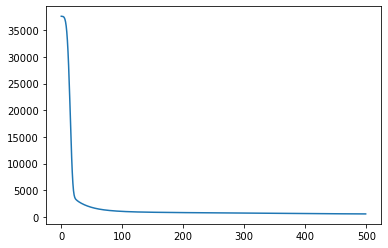

In [64]:
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
print("R2: %.2f" % r2)
plt.plot(history)
plt.show()

In [65]:
print(model[0].weight)

Parameter containing:
tensor([[ 0.4315,  0.0275,  0.1687,  ...,  0.0236,  0.0370, -0.0593],
        [ 0.2421,  0.2220,  0.2390,  ...,  0.0801,  0.0382, -0.1409],
        [ 0.3533,  0.0327,  0.2777,  ...,  0.0641,  0.0537, -0.0268],
        ...,
        [-0.1950,  0.0083,  0.0413,  ..., -0.0604,  0.0658,  0.1393],
        [ 0.2264,  0.0951,  0.2287,  ...,  0.0168,  0.0510, -0.0554],
        [ 0.2716,  0.1642,  0.1597,  ...,  0.0863,  0.0614,  0.0520]],
       requires_grad=True)


In [66]:
# Make predictions on the training and testing sets
y_train_pred = model(X_train).detach().numpy()
y_test_pred = model(X_test).detach().numpy()

# Calculate mean squared error on the training and testing sets
nn_mse_train = mean_squared_error(y_train, y_train_pred)
nn_mse_test = mean_squared_error(y_test, y_test_pred)

# Compute R-squared error on the training and testing sets
nn_r2_train = r2_score(y_train, y_train_pred)
nn_r2_test = r2_score(y_test, y_test_pred)

# Calculate percentage difference between MSE of train set and test set
nn_perc_diff = (nn_mse_train - nn_mse_test) / nn_mse_train * 100

mae_nn = mean_absolute_error(y_test, y_test_pred)

# # Print the MSE and percentage difference
print(f'MSE on Training set: {nn_mse_train}')
print(f'MSE on Testing set: {nn_mse_test}')
print(f'MAE on Testing set: {mae_nn}')
print(f'% difference between MSE of Train set and Test set: {str(nn_perc_diff)+"%"}')
print(f'R-squared error on Training set: {nn_r2_train}')
print(f'R-squared error on Testing set: {nn_r2_test}')

MSE on Training set: 386.25714111328125
MSE on Testing set: 566.0215454101562
MAE on Testing set: 15.544859886169434
% difference between MSE of Train set and Test set: -46.54008448123932%
R-squared error on Training set: 0.933480673915337
R-squared error on Testing set: 0.9005139121459648


In [67]:
import pandas as pd

# Define the performance metrics for each model as lists
models = [
    ["Linear Regression", lr_mse_train, lr_mse_test, mae_lr, lr_perc_diff, rsquaredTrain, rsquaredTest],
    ["Decision Tree Tuned", dt_mse_train, dt_mse_test, mae_dt, dt_perc_diff, dt_r2_train, dt_r2_test],
    ["Gradient Boosting Tuned", gbm_mse_train, gbm_mse_test, mae_gb, gbm_perc_diff, gbm_r2_train, gbm_r2_test],
    ["Neural Network", nn_mse_train, nn_mse_test, mae_nn, nn_perc_diff, nn_r2_train, nn_r2_test],
]


# Create a pandas DataFrame
df = pd.DataFrame(models, columns=["Model", "MSE_train", "MSE_test", "MAE_test", "MSE Percent diff", "R2_train", "R2_test"])
df = df.set_index("Model")
df = df.round(3)

df.to_csv("Model Performance.csv")


In [68]:
df

,MSE_train,MSE_test,MAE_test,MSE Percent diff,R2_train,R2_test
Model,,,,,,
Linear Regression,618.689,711.904,17.710,-15.067,0.884,0.895
Decision Tree Tuned,274.286,1148.205,22.659,-318.617,0.949,0.830
Gradient Boosting Tuned,282.991,525.743,14.907,-85.781,0.947,0.922
Neural Network,386.257,566.022,15.545,-46.540,0.933,0.901
